* ML09 ニューラルネットワーク
  * tensorflow をインストールする
  * Google Colab はインストール済み

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
from sklearn.datasets import fetch_openml
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 手書き文字のデータセットをダウンロードして、実験用データを準備 (70000枚のうち7000枚を利用)
mnist_data = fetch_openml('mnist_784', version=1)
_x = np.array(mnist_data['data'].astype(np.float32))
_y = np.array(mnist_data['target'].astype(np.int32))
_, x, _, y = train_test_split(_x, _y, test_size=0.1, random_state=1)

# 特徴量は 0-1 の範囲に正規化、ターゲットは one-hot ベクトル化
x = x / 255
y = np.identity(10)[y]

# データを学習用と検証用に分割
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25, random_state=1) # 検証用データに25%を割当て
print(f'x_train:{len(x_train)} x_test:{len(x_test)} y_train:{len(y_train)} y_test:{len(y_test)}')

x_train:5250 x_test:1750 y_train:5250 y_test:1750


55/55 [==============================] - 0s 1ms/step
y_test[0] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] -> pred_test[0] [0.00156, 0.00000, 0.98474, 0.00000, 0.00001,0.00004, 0.00002, 0.00000, 0.01337, 0.00025]
y_test[1] [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] -> pred_test[1] [0.00000, 0.00000, 0.00010, 0.00015, 0.00000,0.00000, 0.00000, 0.00000, 0.99973, 0.00000]
y_test[2] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] -> pred_test[2] [0.00005, 0.00000, 0.00017, 0.00327, 0.00037,0.00033, 0.00001, 0.00248, 0.00020, 0.99313]
y_test[3] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] -> pred_test[3] [0.00000, 0.00083, 0.18971, 0.80931, 0.00000,0.00000, 0.00000, 0.00000, 0.00015, 0.00000]
y_test[4] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] -> pred_test[4] [0.00001, 0.00000, 0.99990, 0.00000, 0.00000,0.00001, 0.00000, 0.00000, 0.00008, 0.00000]
y_test[5] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] -> pred_test[5] [0.00000, 0.00000, 0.00000, 0.00000, 0.00593,0.00000, 0.00000, 0.00003, 0.00000, 0.99403]
y_test[6] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] -> pred_test[6] [

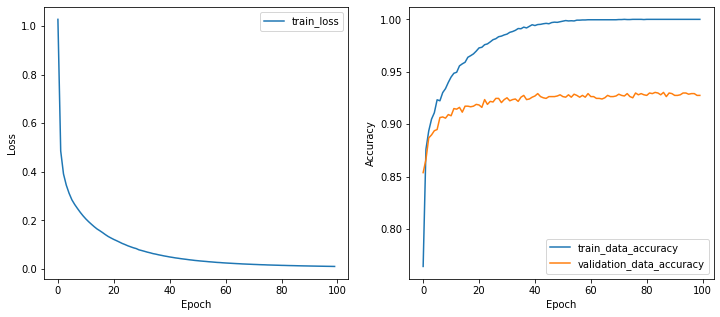

Wall time: 1min 43s


In [7]:
%%time 
# パラメータは元のプログラムのもの
tf.random.set_seed(1) # tensorflow で利用する乱数のシードを設定

# ニューラルネットワークのモデルを作成
mnist_model = tf.keras.models.Sequential(name='mnist_model') # ニューラルネットワークのモデルの箱を用意
mnist_model.add(tf.keras.Input(shape=(784,))) # 784入力の入力層
mnist_model.add(tf.keras.layers.Dense(units=784, activation='relu')) # 784入力のセルを784個用意、活性化関数は ReLU
mnist_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) # セルを10個からなる出力層を用意、活性化関数はソフトマックス

# 学習時の設定を行い、学習を実施 (学習中のlossと正解率の変化をグラフで表示)
mnist_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # 学習時の損失関数、最適化関数、評価関数を設定
history = mnist_model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0,   # fit関数で学習を実施
                          validation_data=(x_test, y_test))  # validation用のデータを設定

# 学習したモデルで検証用データの品種を予測し、個体ごとに結果を表示
pred_test = mnist_model.predict(x_test)
for i in range(10):
    print(f'y_test[{i}] {y_test[i]} -> ' + 
          f'pred_test[{i}] [{pred_test[i][0]:.5f}, {pred_test[i][1]:.5f}, {pred_test[i][2]:.5f}, {pred_test[i][3]:.5f}, {pred_test[i][4]:.5f},' + 
          f'{pred_test[i][5]:.5f}, {pred_test[i][6]:.5f}, {pred_test[i][7]:.5f}, {pred_test[i][8]:.5f}, {pred_test[i][9]:.5f}]')

# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
train_loss, train_accuracy = mnist_model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = mnist_model.evaluate(x_test, y_test, verbose=0)
print(f'mnist_model, accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')

# 学習中の精度の変化をグラフで表示
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].plot(history.history['loss'], label='train_loss') # 学習中のlossの変化をグラフで表示
ax[0].legend(loc='upper right')
ax[1].plot(history.history['accuracy'], label='train_data_accuracy') # 学習中の学習用データに対する正解率の変化をグラフで表示
ax[1].plot(history.history['val_accuracy'], label='validation_data_accuracy') # 学習中の検証用データに対する正解率の変化をグラフで表示
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='lower right')
plt.show()

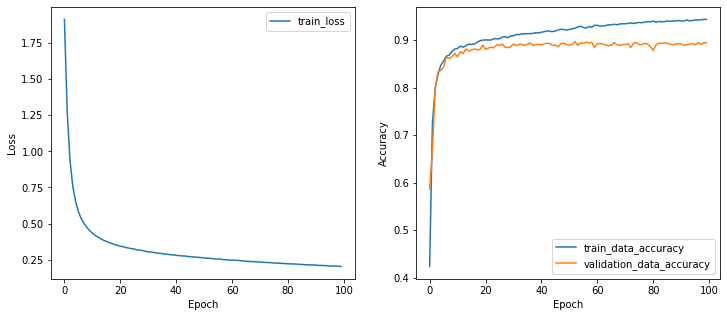

mnist_model, accuracy_score: train data : 0.94762  test data : 0.89486
Wall time: 1min 39s


In [8]:
%%time 
# 中間層の活性化関数を sigmoid に変更
tf.random.set_seed(1) # tensorflow で利用する乱数のシードを設定

# ニューラルネットワークのモデルを作成
mnist_model = tf.keras.models.Sequential(name='mnist_model') # ニューラルネットワークのモデルの箱を用意
mnist_model.add(tf.keras.Input(shape=(784,))) # 784入力の入力層
mnist_model.add(tf.keras.layers.Dense(units=784, activation='sigmoid')) # 784入力のセルを784個用意、活性化関数は sigmoid
mnist_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) # セルを10個からなる出力層を用意、活性化関数はソフトマックス

# 学習時の設定を行い、学習を実施 (学習中のlossと正解率の変化をグラフで表示)
mnist_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # 学習時の損失関数、最適化関数、評価関数を設定
history = mnist_model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0,   # fit関数で学習を実施
                          validation_data=(x_test, y_test))  # validation用のデータを設定
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].plot(history.history['loss'], label='train_loss') # 学習中のlossの変化をグラフで表示
ax[0].legend(loc='upper right')
ax[1].plot(history.history['accuracy'], label='train_data_accuracy') # 学習中の学習用データに対する正解率の変化をグラフで表示
ax[1].plot(history.history['val_accuracy'], label='validation_data_accuracy') # 学習中の検証用データに対する正解率の変化をグラフで表示
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='lower right')
plt.show()

# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
train_loss, train_accuracy = mnist_model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = mnist_model.evaluate(x_test, y_test, verbose=0)
print(f'mnist_model, accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')

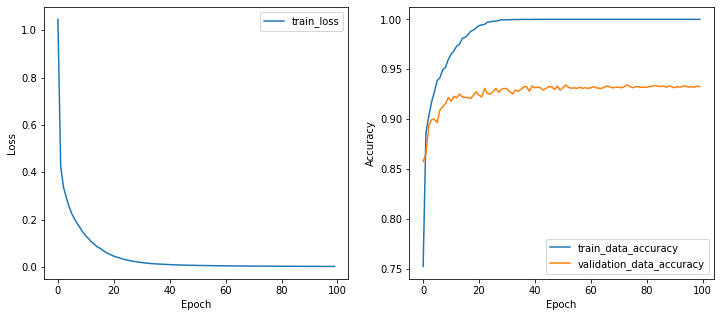

mnist_model, accuracy_score: train data : 1.00000  test data : 0.93257
Wall time: 1min 58s


In [9]:
%%time 
# 中間層を1層追加
tf.random.set_seed(1) # tensorflow で利用する乱数のシードを設定

# ニューラルネットワークのモデルを作成
mnist_model = tf.keras.models.Sequential(name='mnist_model') # ニューラルネットワークのモデルの箱を用意
mnist_model.add(tf.keras.Input(shape=(784,))) # 784入力の入力層
mnist_model.add(tf.keras.layers.Dense(units=784, activation='relu')) # 784入力のセルを784個用意、活性化関数は ReLU
mnist_model.add(tf.keras.layers.Dense(units=784, activation='relu')) # 784入力のセルを784個用意、活性化関数は ReLU
mnist_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) # セルを10個からなる出力層を用意、活性化関数はソフトマックス

# 学習時の設定を行い、学習を実施 (学習中のlossと正解率の変化をグラフで表示)
mnist_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # 学習時の損失関数、最適化関数、評価関数を設定
history = mnist_model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0,   # fit関数で学習を実施
                          validation_data=(x_test, y_test))  # validation用のデータを設定
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].plot(history.history['loss'], label='train_loss') # 学習中のlossの変化をグラフで表示
ax[0].legend(loc='upper right')
ax[1].plot(history.history['accuracy'], label='train_data_accuracy') # 学習中の学習用データに対する正解率の変化をグラフで表示
ax[1].plot(history.history['val_accuracy'], label='validation_data_accuracy') # 学習中の検証用データに対する正解率の変化をグラフで表示
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='lower right')
plt.show()

# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
train_loss, train_accuracy = mnist_model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = mnist_model.evaluate(x_test, y_test, verbose=0)
print(f'mnist_model, accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')

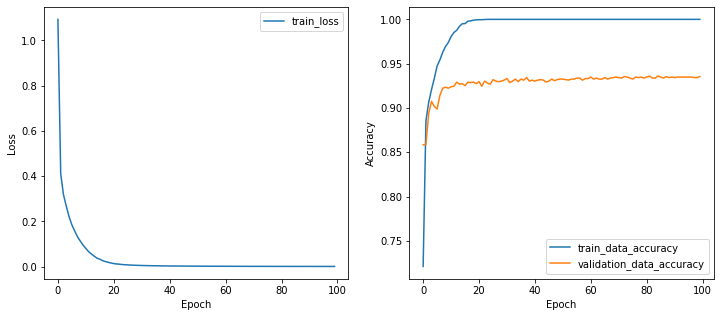

mnist_model, accuracy_score: train data : 1.00000  test data : 0.93543
Wall time: 2min 13s


In [10]:
%%time 
# 中間層を2層追加
tf.random.set_seed(1) # tensorflow で利用する乱数のシードを設定

# ニューラルネットワークのモデルを作成
mnist_model = tf.keras.models.Sequential(name='mnist_model') # ニューラルネットワークのモデルの箱を用意
mnist_model.add(tf.keras.Input(shape=(784,))) # 784入力の入力層
mnist_model.add(tf.keras.layers.Dense(units=784, activation='relu')) # 784入力のセルを784個用意、活性化関数は ReLU
mnist_model.add(tf.keras.layers.Dense(units=784, activation='relu')) # 784入力のセルを784個用意、活性化関数は ReLU
mnist_model.add(tf.keras.layers.Dense(units=784, activation='relu')) # 784入力のセルを784個用意、活性化関数は ReLU
mnist_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) # セルを10個からなる出力層を用意、活性化関数はソフトマックス

# 学習時の設定を行い、学習を実施 (学習中のlossと正解率の変化をグラフで表示)
mnist_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # 学習時の損失関数、最適化関数、評価関数を設定
history = mnist_model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0,   # fit関数で学習を実施
                          validation_data=(x_test, y_test))  # validation用のデータを設定
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].plot(history.history['loss'], label='train_loss') # 学習中のlossの変化をグラフで表示
ax[0].legend(loc='upper right')
ax[1].plot(history.history['accuracy'], label='train_data_accuracy') # 学習中の学習用データに対する正解率の変化をグラフで表示
ax[1].plot(history.history['val_accuracy'], label='validation_data_accuracy') # 学習中の検証用データに対する正解率の変化をグラフで表示
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='lower right')
plt.show()

# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
train_loss, train_accuracy = mnist_model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = mnist_model.evaluate(x_test, y_test, verbose=0)
print(f'mnist_model, accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')

n= 784


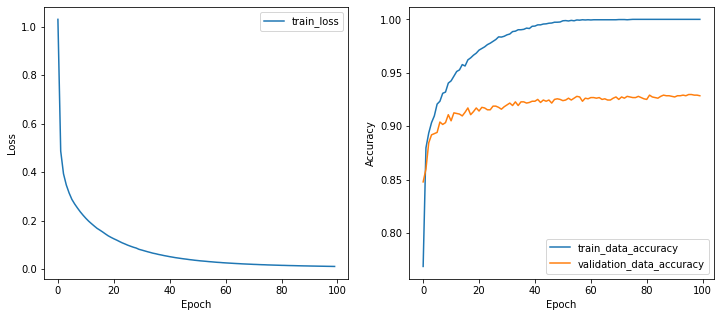

n=784: mnist_model, accuracy_score: train data : 1.00000  test data : 0.92857
n= 1586


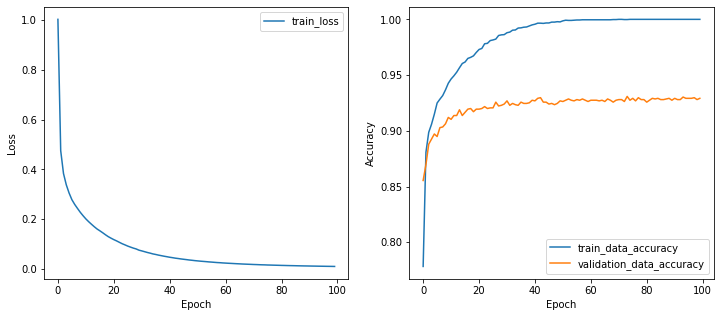

n=1586: mnist_model, accuracy_score: train data : 1.00000  test data : 0.92914
n= 392


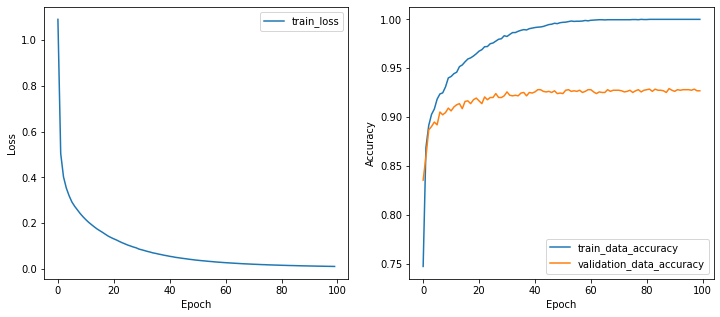

n=392: mnist_model, accuracy_score: train data : 1.00000  test data : 0.92686
n= 196


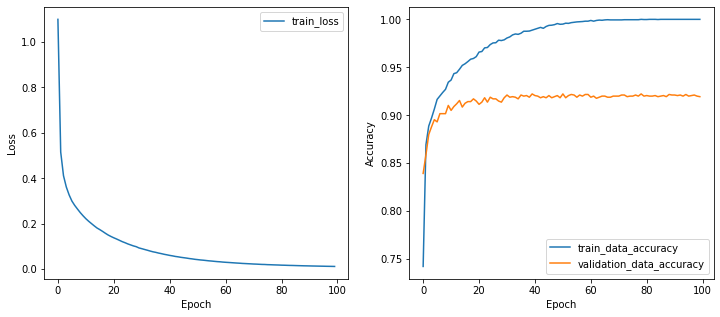

n=196: mnist_model, accuracy_score: train data : 1.00000  test data : 0.91943
n= 98


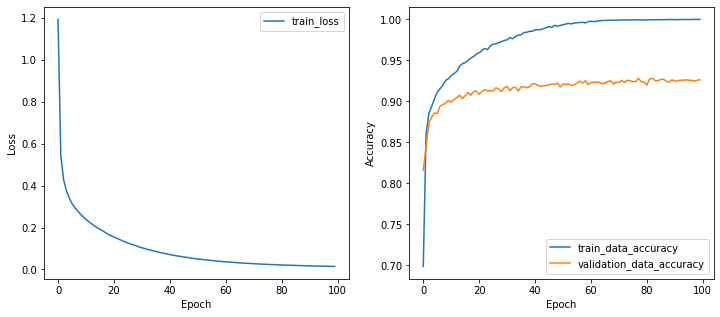

n=98: mnist_model, accuracy_score: train data : 1.00000  test data : 0.92629
n= 10


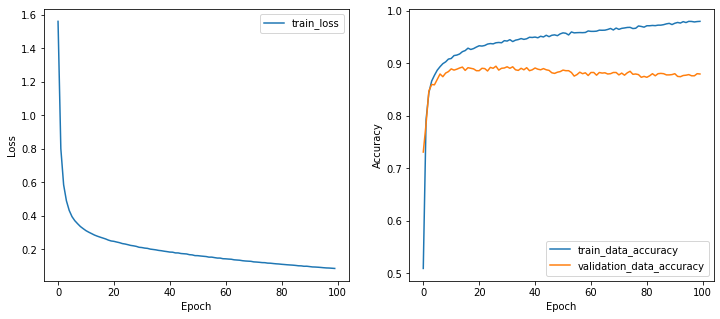

n=10: mnist_model, accuracy_score: train data : 0.98419  test data : 0.87943
Wall time: 10min 7s


In [11]:
%%time 
# 中間層の活性化関数を relu に、中間層のセル数を変えて実験

for n in [784, 1586, 392, 196, 98, 10]:
    tf.random.set_seed(1) # tensorflow で利用する乱数のシードを設定
    # ニューラルネットワークのモデルを作成
    mnist_model = tf.keras.models.Sequential(name='mnist_model') # ニューラルネットワークのモデルの箱を用意
    mnist_model.add(tf.keras.Input(shape=(784,))) # 784入力の入力層
    mnist_model.add(tf.keras.layers.Dense(units=n, activation='relu')) # 784入力のセルを n 個用意、活性化関数は ReLU
    mnist_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) # セルを10個からなる出力層を用意、活性化関数はソフトマックス

    # 学習時の設定を行い、学習を実施 (学習中のlossと正解率の変化をグラフで表示)
    mnist_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # 学習時の損失関数、最適化関数、評価関数を設定
    history = mnist_model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0,   # fit関数で学習を実施
                            validation_data=(x_test, y_test))  # validation用のデータを設定
    fig, ax = plt.subplots(1,2,figsize=(12,5))
    print('n=', n)
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].plot(history.history['loss'], label='train_loss') # 学習中のlossの変化をグラフで表示
    ax[0].legend(loc='upper right')
    ax[1].plot(history.history['accuracy'], label='train_data_accuracy') # 学習中の学習用データに対する正解率の変化をグラフで表示
    ax[1].plot(history.history['val_accuracy'], label='validation_data_accuracy') # 学習中の検証用データに対する正解率の変化をグラフで表示
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(loc='lower right')
    plt.show()

    # 学習したモデルの性能(正答率)を学習用データと検証用データで評価
    train_loss, train_accuracy = mnist_model.evaluate(x_train, y_train, verbose=0)
    test_loss, test_accuracy = mnist_model.evaluate(x_test, y_test, verbose=0)
    print(f'n={n}: mnist_model, accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')

In [12]:
%%time 
# パラメータは元のプログラムのもの、10回試行
tf.random.set_seed(1) # tensorflow で利用する乱数のシードを設定

for i in range(10):
    # ニューラルネットワークのモデルを作成
    mnist_model = tf.keras.models.Sequential(name='mnist_model') # ニューラルネットワークのモデルの箱を用意
    mnist_model.add(tf.keras.Input(shape=(784,))) # 784入力の入力層
    mnist_model.add(tf.keras.layers.Dense(units=784, activation='relu')) # 784入力のセルを784個用意、活性化関数は ReLU
    mnist_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) # セルを10個からなる出力層を用意、活性化関数はソフトマックス

    # 学習時の設定を行い、学習を実施 (学習中のlossと正解率の変化をグラフで表示)
    mnist_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # 学習時の損失関数、最適化関数、評価関数を設定
    history = mnist_model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0,   # fit関数で学習を実施
                            validation_data=(x_test, y_test))  # validation用のデータを設定

    # 学習したモデルの性能(正答率)を学習用データと検証用データで評価
    train_loss, train_accuracy = mnist_model.evaluate(x_train, y_train, verbose=0)
    test_loss, test_accuracy = mnist_model.evaluate(x_test, y_test, verbose=0)
    print(f'{i+1}: mnist_model, accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')

1: mnist_model, accuracy_score: train data : 1.00000  test data : 0.92857
2: mnist_model, accuracy_score: train data : 1.00000  test data : 0.93086
3: mnist_model, accuracy_score: train data : 1.00000  test data : 0.92743
4: mnist_model, accuracy_score: train data : 1.00000  test data : 0.92857
5: mnist_model, accuracy_score: train data : 1.00000  test data : 0.92971
6: mnist_model, accuracy_score: train data : 1.00000  test data : 0.92800
7: mnist_model, accuracy_score: train data : 1.00000  test data : 0.92971
8: mnist_model, accuracy_score: train data : 1.00000  test data : 0.93029
9: mnist_model, accuracy_score: train data : 1.00000  test data : 0.93143
10: mnist_model, accuracy_score: train data : 1.00000  test data : 0.92686
Wall time: 17min 11s


In [13]:
# 実験結果のデータを転記して、統計情報を計算
import statistics
a = [0.93200, 0.92857, 0.92857, 0.92629, 0.93029, 0.92686, 0.92914, 0.92971, 0.93200, 0.93086]
print(statistics.mean(a))
print(statistics.pvariance(a))
print(statistics.pstdev(a))

0.9294290000000001
3.4100490000000756e-06
0.0018466317987081442


In [14]:
%%time 
# バッチサイズを変更
for _batch_size in [1, 5, 10, 20, 50]:
    tf.random.set_seed(1) # tensorflow で利用する乱数のシードを設定
    # ニューラルネットワークのモデルを作成
    mnist_model = tf.keras.models.Sequential(name='mnist_model') # ニューラルネットワークのモデルの箱を用意
    mnist_model.add(tf.keras.Input(shape=(784,))) # 784入力の入力層
    mnist_model.add(tf.keras.layers.Dense(units=784, activation='relu')) # 784入力のセルを784個用意、活性化関数は ReLU
    mnist_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) # セルを10個からなる出力層を用意、活性化関数はソフトマックス

    # 学習時の設定を行い、学習を実施 (学習中のlossと正解率の変化をグラフで表示)
    mnist_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # 学習時の損失関数、最適化関数、評価関数を設定
    history = mnist_model.fit(x_train, y_train, epochs=100, batch_size=_batch_size, verbose=0,   # fit関数で学習を実施
                            validation_data=(x_test, y_test))  # validation用のデータを設定

    # 学習したモデルの性能(正答率)を学習用データと検証用データで評価
    train_loss, train_accuracy = mnist_model.evaluate(x_train, y_train, verbose=0)
    test_loss, test_accuracy = mnist_model.evaluate(x_test, y_test, verbose=0)
    print(f'batch_size {_batch_size}: mnist_model, accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')

batch_size 1: mnist_model, accuracy_score: train data : 1.00000  test data : 0.93943
batch_size 5: mnist_model, accuracy_score: train data : 1.00000  test data : 0.93429
batch_size 10: mnist_model, accuracy_score: train data : 1.00000  test data : 0.92686
batch_size 20: mnist_model, accuracy_score: train data : 0.99886  test data : 0.92514
batch_size 50: mnist_model, accuracy_score: train data : 0.97390  test data : 0.91600
Wall time: 21min 1s
